In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit import DataStructs

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, RocCurveDisplay, auc, roc_auc_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('final_total', sep=' ', na_values=['na'])
df

,CHEMBLID,smiles,ido_ic50,tdo_ic50
0,CHEMBL1098875,O=C1c2cc(F)ccc2-n2c1nc1ccccc1c2=O,23.0,60.0
1,CHEMBL1209728,Cc1c(Br)oc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)C,10000.0,10000.0
2,CHEMBL1276265,O=C1c2ccc(Cl)cc2-n2c1nc1ccccc1c2=O,183.0,224200.0
3,CHEMBL1346056,Oc1ccccc1-c1nc2c3ccccc3c3ccccc3c2[nH]1,11790.0,12250.0
4,CHEMBL139935,O=[N+]([O-])c1cc(F)c2cccnc2c1O,14610.0,30230.0
...,...,...,...,...
800,CHEMBL5221020,O[C@@H]1CCCC[C@H]1CNc1c(Br)ccc2[nH]ncc12,1230.0,11240.0
801,CHEMBL5221102,Brc1cc(NC[C@H]2CCCN2)c2cn[nH]c2c1,56450.0,7450.0
802,CHEMBL578036,CC1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(CO)coc2-1,10000.0,450.0
803,CHEMBL584991,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Cl)c1,50.0,10000.0


In [3]:
df2 = df.dropna(ignore_index=True)
df2

,CHEMBLID,smiles,ido_ic50,tdo_ic50
0,CHEMBL1098875,O=C1c2cc(F)ccc2-n2c1nc1ccccc1c2=O,23.0,60.0
1,CHEMBL1209728,Cc1c(Br)oc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)C,10000.0,10000.0
2,CHEMBL1276265,O=C1c2ccc(Cl)cc2-n2c1nc1ccccc1c2=O,183.0,224200.0
3,CHEMBL1346056,Oc1ccccc1-c1nc2c3ccccc3c3ccccc3c2[nH]1,11790.0,12250.0
4,CHEMBL139935,O=[N+]([O-])c1cc(F)c2cccnc2c1O,14610.0,30230.0
...,...,...,...,...
755,CHEMBL5221020,O[C@@H]1CCCC[C@H]1CNc1c(Br)ccc2[nH]ncc12,1230.0,11240.0
756,CHEMBL5221102,Brc1cc(NC[C@H]2CCCN2)c2cn[nH]c2c1,56450.0,7450.0
757,CHEMBL578036,CC1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(CO)coc2-1,10000.0,450.0
758,CHEMBL584991,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Cl)c1,50.0,10000.0


In [4]:
df2.loc[:, 'ido_ic50'] = (np.log10((df2.loc[:, 'ido_ic50'])*10**(-9)))*(-1)

In [5]:
df2.loc[:, 'tdo_ic50'] = (np.log10((df2.loc[:, 'tdo_ic50'])*10**(-9)))*(-1)

In [6]:
df2

,CHEMBLID,smiles,ido_ic50,tdo_ic50
0,CHEMBL1098875,O=C1c2cc(F)ccc2-n2c1nc1ccccc1c2=O,7.638272,7.221849
1,CHEMBL1209728,Cc1c(Br)oc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)C,5.000000,5.000000
2,CHEMBL1276265,O=C1c2ccc(Cl)cc2-n2c1nc1ccccc1c2=O,6.737549,3.649364
3,CHEMBL1346056,Oc1ccccc1-c1nc2c3ccccc3c3ccccc3c2[nH]1,4.928486,4.911864
4,CHEMBL139935,O=[N+]([O-])c1cc(F)c2cccnc2c1O,4.835350,4.519562
...,...,...,...,...
755,CHEMBL5221020,O[C@@H]1CCCC[C@H]1CNc1c(Br)ccc2[nH]ncc12,5.910095,4.949234
756,CHEMBL5221102,Brc1cc(NC[C@H]2CCCN2)c2cn[nH]c2c1,4.248336,5.127844
757,CHEMBL578036,CC1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(CO)coc2-1,5.000000,6.346787
758,CHEMBL584991,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Cl)c1,7.301030,5.000000


In [7]:
df3 = df2.loc[:, ['ido_ic50', 'tdo_ic50']]
df3

,ido_ic50,tdo_ic50
0,7.638272,7.221849
1,5.000000,5.000000
2,6.737549,3.649364
3,4.928486,4.911864
4,4.835350,4.519562
...,...,...
755,5.910095,4.949234
756,4.248336,5.127844
757,5.000000,6.346787
758,7.301030,5.000000


In [9]:
from rdkit.Chem import SaltRemover as sr
remover = sr.SaltRemover()

In [10]:
mols = []
for i in range(len(df2['smiles'])):
    mol_i = Chem.MolFromSmiles(df2['smiles'][i])
    mol_i = remover.StripMol(mol_i, dontRemoveEverything=True)
    mols.append(mol_i)
len(mols)

760

In [11]:
#Morgan Fingerprints:
fpgen2 = AllChem.GetMorganGenerator()
i = 0
l2 = np.zeros((1, 2048), dtype='uint8')
for mol in mols:
    fp2 = fpgen2.GetFingerprintAsNumPy(mols[i])
    l2 = np.vstack((l2, fp2))
    i += 1
mfp = l2[1:, :]
mfp.shape
mfp.sum()

45791

In [12]:
dfFP = pd.DataFrame(mfp)
dfFP

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
756,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
fpgen = AllChem.GetMorganGenerator(radius=2)
ao = AllChem.AdditionalOutput()
ao.CollectBitInfoMap()
fp = fpgen.GetFingerprint(mols[0],additionalOutput=ao)
bi = ao.GetBitInfoMap()

In [19]:
for i in range(760):
    if df3['ido_ic50'].values[i] >= 6.15:
        df3['ido_ic50'][i] = 'A'
    else:
        df3['ido_ic50'][i] = 'I'

In [20]:
for i in range(760):
    if df3['tdo_ic50'].values[i] >= 6.0:
        df3['tdo_ic50'][i] = 'A'
    else:
        df3['tdo_ic50'][i] = 'I'

/tmp/ipykernel_6847/565967957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['tdo_ic50'][i] = 'A'


In [21]:
df3

,ido_ic50,tdo_ic50
0,A,A
1,I,I
2,A,I
3,I,I
4,I,I
...,...,...
755,I,I
756,I,I
757,I,A
758,A,I


In [22]:
newcol = []
for i in range(760):
    if df3['ido_ic50'].values[i] == 'A' and df3['tdo_ic50'].values[i] == 'A':
        newcol.append('AA')
    elif df3['ido_ic50'].values[i] == 'I' and df3['tdo_ic50'].values[i] == 'I':
        newcol.append('II')
    elif df3['ido_ic50'].values[i] == 'I' and df3['tdo_ic50'].values[i] == 'A':
        newcol.append('IA')
    else:
        newcol.append('AI')

In [24]:
ido_tdo = pd.DataFrame(data=newcol, columns=['ido_tdo'])
ido_tdo

,ido_tdo
0,AA
1,II
2,AI
3,II
4,II
...,...
755,II
756,II
757,IA
758,AI


In [25]:
y = ido_tdo.values.reshape(760,)
y.shape

(760,)

In [26]:
encoder = LabelEncoder()

In [27]:
y_label = encoder.fit_transform(y)

In [28]:
y_label

array([0, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 2, 3, 3, 1, 2, 1, 2, 3, 3, 2, 3,
       3, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 3, 0, 0,
       1, 3, 0, 2, 1, 3, 3, 1, 0, 1, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0,
       3, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 3, 0, 0, 3,
       0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 3, 1, 1, 2, 0, 3, 3, 0, 0, 3, 0, 3,
       0, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 3, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 3, 0, 3, 3, 3, 2, 2, 0, 1, 0, 2, 3, 0, 0, 1, 0, 0, 0,
       3, 3, 0, 0, 3, 3, 1, 2, 3, 0, 3, 0, 2, 0, 1, 3, 1, 0, 0, 3, 3, 0,
       0, 2, 1, 0, 3, 0, 3, 3, 0, 3, 3, 1, 1, 3, 3,

In [29]:
chi2_stats, p_values = chi2(dfFP, y_label)

In [32]:
df_pvalue = pd.DataFrame(p_values.reshape(1, -1))
df_pvalue

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.779638,0.547243,0.516878,0.034285,0.676532,0.384005,0.0455,0.732631,0.284357,0.287681,...,0.555395,0.000011,0.574665,0.568594,0.158,0.021741,3.430420e-07,0.506088,0.676532,0.685811


In [33]:
df11 = df_pvalue <= 0.0000000001
df11

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
aa = np.zeros((1, 2048))
for i in range(760):
    aa = np.vstack((aa, df11))

In [35]:
aa = aa[1:, :]
filter = (aa == 1)
filter.shape

(760, 2048)

In [36]:
filter = pd.DataFrame(filter)
filter

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
756,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
757,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
758,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
X = dfFP[filter].dropna(axis=1, ignore_index=True)
X

,28,70,86,91,119,133,143,158,184,191,...,1724,1728,1790,1816,1825,1830,1852,1894,1989,2029
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
756,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
758,0,1,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0


In [38]:
X.columns

Index([  28,   70,   86,   91,  119,  133,  143,  158,  184,  191,  216,  323,
        329,  343,  368,  381,  403,  424,  483,  526,  582,  609,  618,  629,
        670,  683,  693,  695,  703,  705,  725,  772,  774,  787,  795,  807,
        816,  825,  843,  878,  899,  906,  979,  983,  985, 1000, 1002, 1050,
       1070, 1077, 1103, 1114, 1120, 1155, 1224, 1424, 1452, 1457, 1464, 1482,
       1522, 1542, 1563, 1565, 1603, 1623, 1706, 1724, 1728, 1790, 1816, 1825,
       1830, 1852, 1894, 1989, 2029],
      dtype='int64')

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y_label, test_size=0.2, random_state=1658484)
x_test.shape

(152, 77)

In [40]:
a = list(np.linspace(0.1, 1.1, (10)).round(1))
a

[0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 1.0, 1.1]

In [41]:
for i in a:
    model = LinearSVC(C=1.0, max_iter=10000, dual=False)
    print(np.mean(cross_val_score(model, x_train, y_train, cv=5)))

0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236


In [42]:
for i in range(1, 20):
    model = LinearSVC(C=1.0, max_iter=10000, dual=False)
    print(np.mean(cross_val_score(model, x_train, y_train, cv=5)))

0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236
0.6891207153502236


In [43]:
model = LinearSVC(C=1.0, max_iter=10000, dual=False, random_state=1656544)

In [44]:
np.mean(cross_val_score(model, x_train, y_train, cv=5))

0.6891207153502236

In [45]:
np.mean(cross_val_score(model, x_test, y_test, cv=5))

0.6243010752688172

In [46]:
model.fit(x_train, y_train)

LinearSVC(dual=False, max_iter=10000, random_state=1656544)

In [47]:
model.coef_.shape

(4, 77)

In [48]:
model.score(x_train, y_train)

0.7861842105263158

In [49]:
model.score(x_test, y_test)

0.756578947368421

In [50]:
py_train = model.predict(x_train)

In [51]:
py_test = model.predict(x_test)

In [52]:
print(classification_report(y_train, py_train))

              precision    recall  f1-score   support

           0       0.74      0.83      0.79       178
           1       0.83      0.73      0.78       128
           2       0.71      0.50      0.59        64
           3       0.81      0.86      0.84       238

    accuracy                           0.79       608
   macro avg       0.77      0.73      0.75       608
weighted avg       0.79      0.79      0.78       608



In [53]:
print(classification_report(y_test, py_test))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        30
           1       0.93      0.65      0.77        43
           2       0.75      0.38      0.50        16
           3       0.75      0.86      0.80        63

    accuracy                           0.76       152
   macro avg       0.77      0.70      0.70       152
weighted avg       0.78      0.76      0.75       152



In [54]:
np.mean(cross_val_score(model, x_train, y_train, cv=5))

0.6891207153502236

In [55]:
np.mean(cross_val_score(model, x_test, y_test, cv=5))

0.6243010752688172

Text(0.5, 1.0, 'Feature importance for class AA')

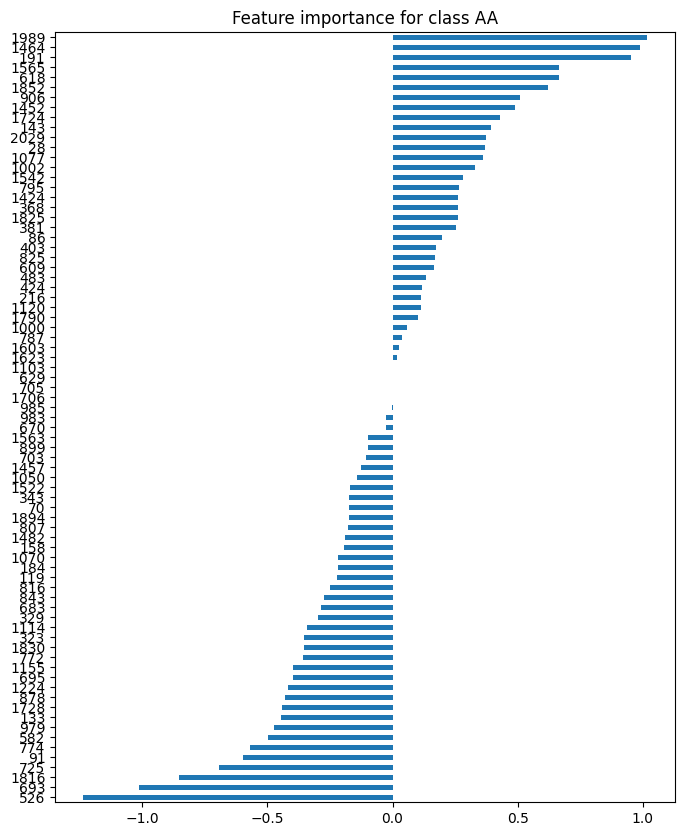

In [57]:
plt.figure(figsize=(8,10))
coef = pd.Series(model.coef_[0], index = X.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance for class AA")

Text(0.5, 1.0, 'Feature importance for class AI')

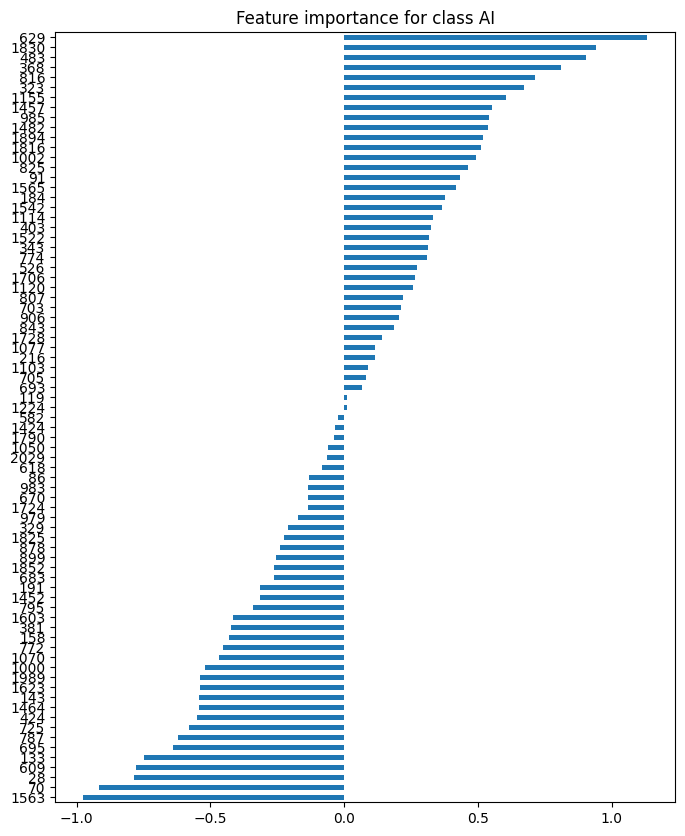

In [58]:
plt.figure(figsize=(8,10))
coef = pd.Series(model.coef_[1], index = X.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance for class AI")

Text(0.5, 1.0, 'Feature importance for class IA')

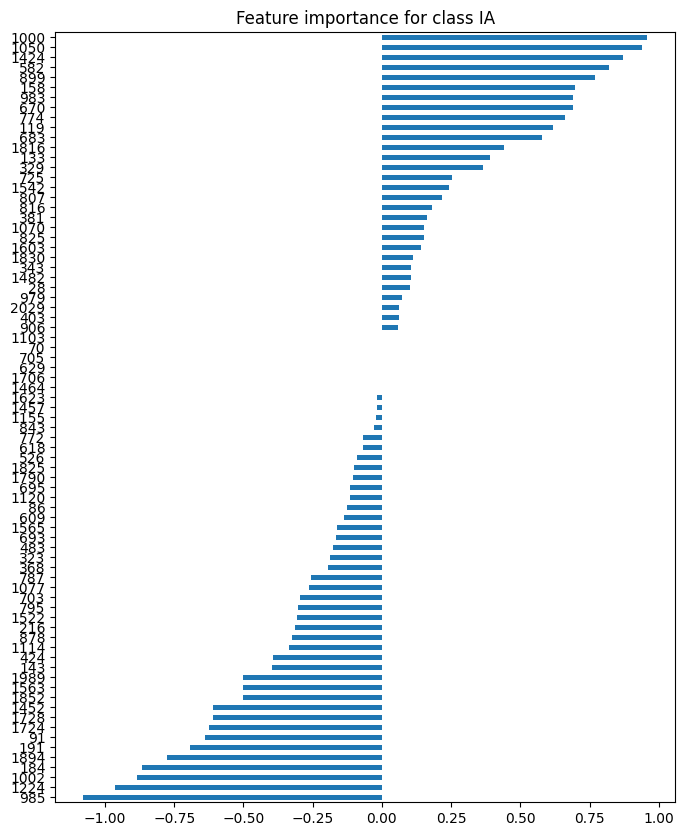

In [59]:
plt.figure(figsize=(8,10))
coef = pd.Series(model.coef_[2], index = X.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance for class IA")

Text(0.5, 1.0, 'Feature importance for class II')

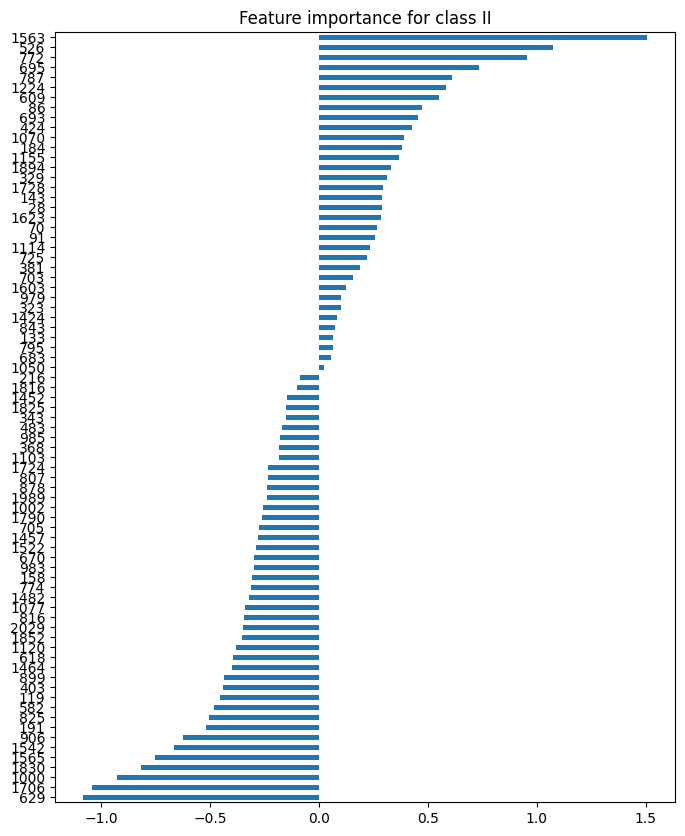

In [60]:
plt.figure(figsize=(8,10))
coef = pd.Series(model.coef_[3], index = X.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance for class II")

In [62]:
#Picking 10 diverse molecules from the set of active molecules against IDO which have the most important fragment.

In [63]:
XX = X[y_label == 1]
XX.shape

(171, 77)

In [64]:
DF2 = XX.loc[:, 629]
idx = DF2[XX.loc[:, 629] == 1].index
idx
#Now we have index of molecules that are active (AI) and have the fragment no. of 629 in their fingerprint.

Index([103, 490, 505, 509, 521, 527, 532, 540, 548, 554, 581, 586, 592, 620,
       622, 624, 625],
      dtype='int64')

In [65]:
idx = list(idx)
active_AI = []
for i in range(len(idx)):
    active_AI.append(mols[idx[i]])
# Now "active_AI" contains ----- active AI molecules 

In [66]:
print(idx)

[103, 490, 505, 509, 521, 527, 532, 540, 548, 554, 581, 586, 592, 620, 622, 624, 625]


In [67]:
len(active_AI)

17

In [69]:
del(active_AI[0])

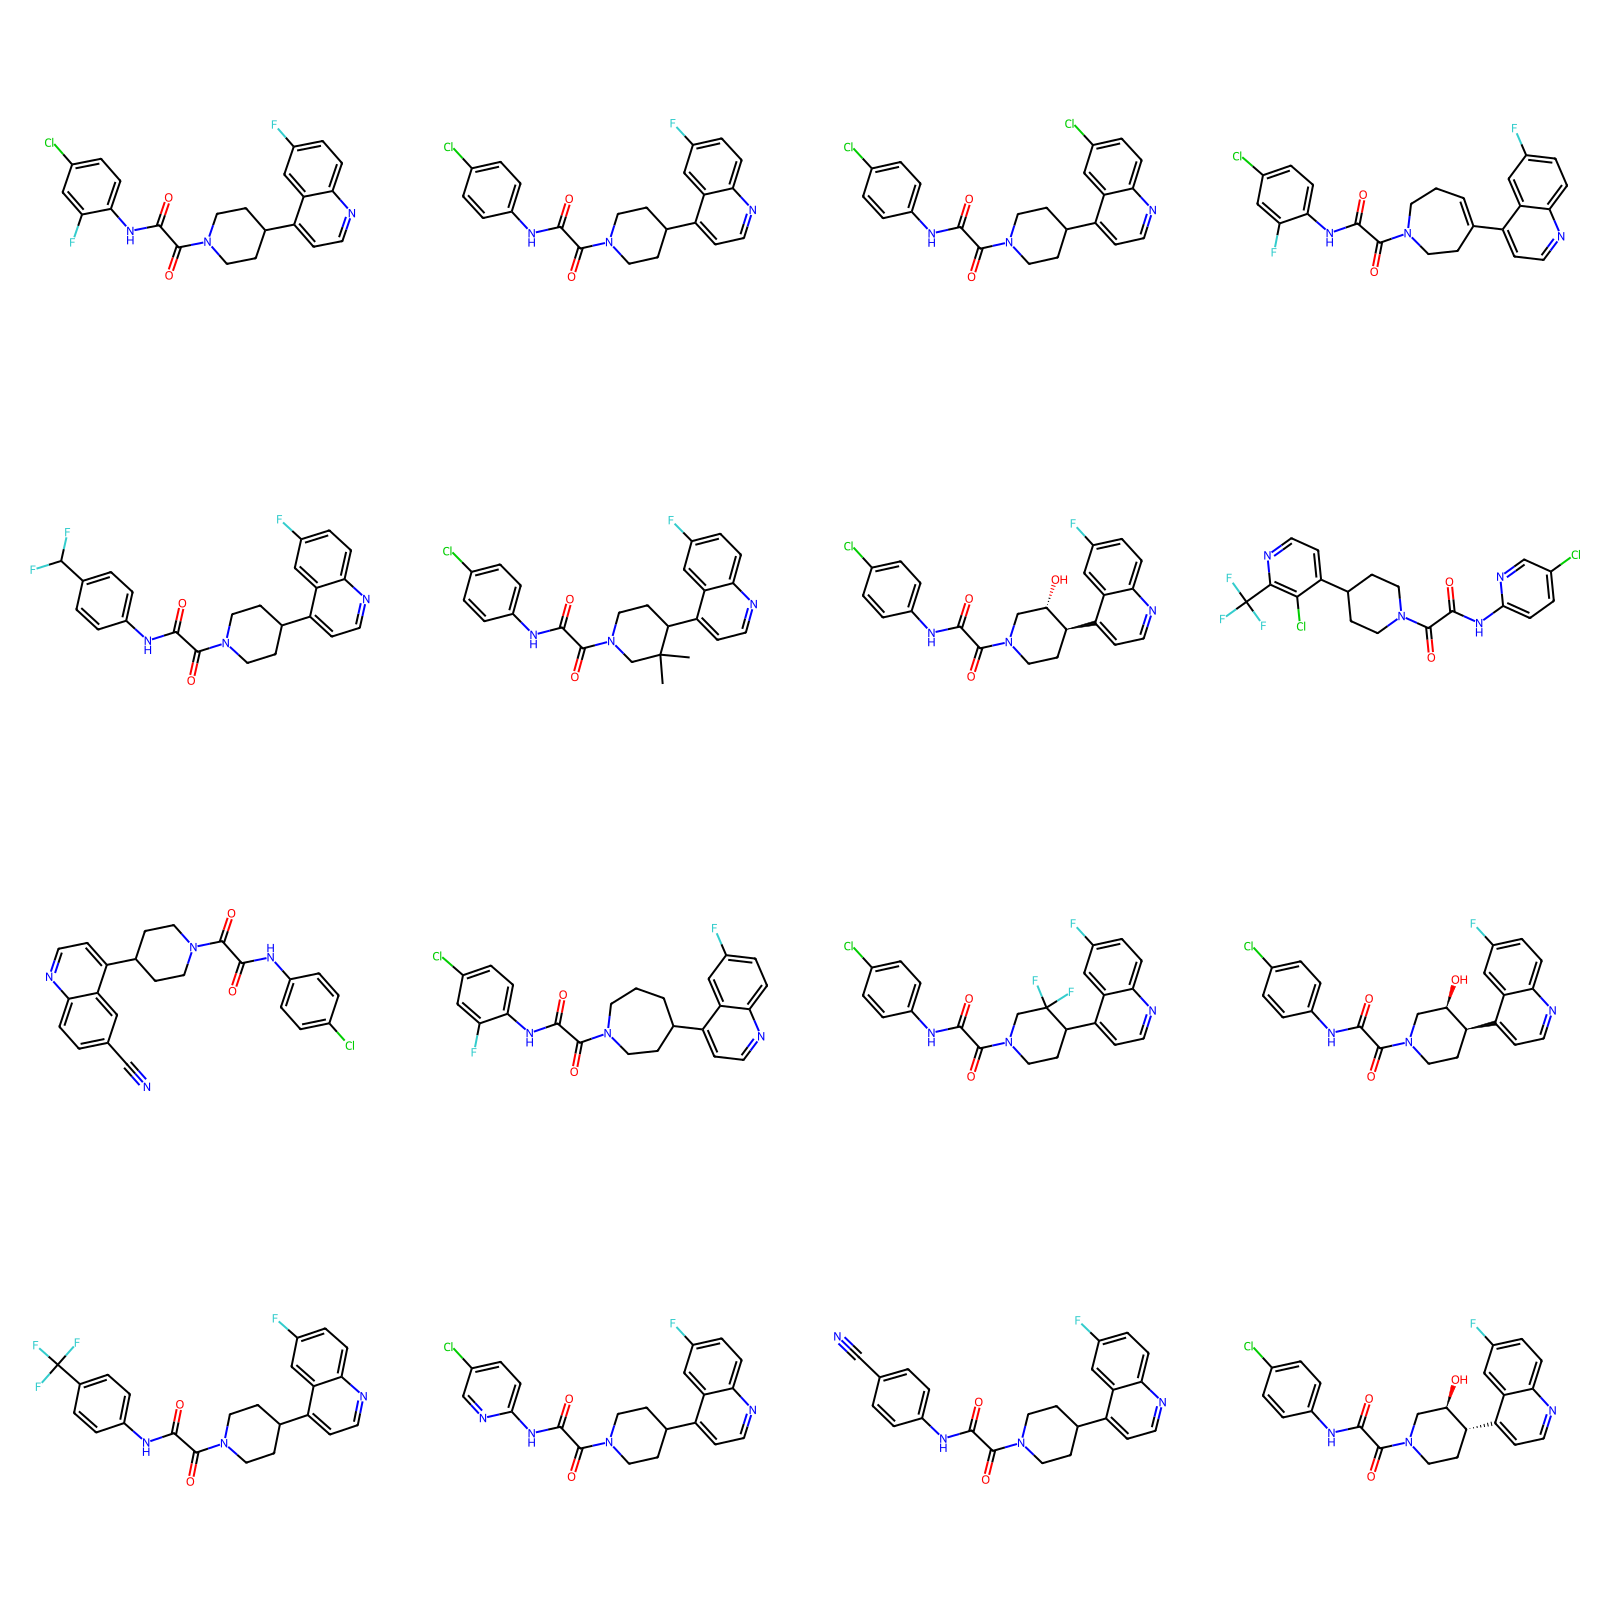

In [70]:
for m in active_AI:
    AllChem.Compute2DCoords(m)
img=Draw.MolsToGridImage(active_AI,maxMols=57, molsPerRow=4,subImgSize=(400,400))
img

In [74]:
fpgen = AllChem.GetMorganGenerator()
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

fps = [fpgen.GetFingerprint(x) for x in active_AI]
len(fps)   
picker = MaxMinPicker()
pickIndices = picker.LazyBitVectorPick(fps,len(fps),10,seed=23)
list(pickIndices)    #index of 10 diverse active molecules in the "active_AI".

[8, 3, 7, 5, 9, 4, 6, 13, 2, 14]

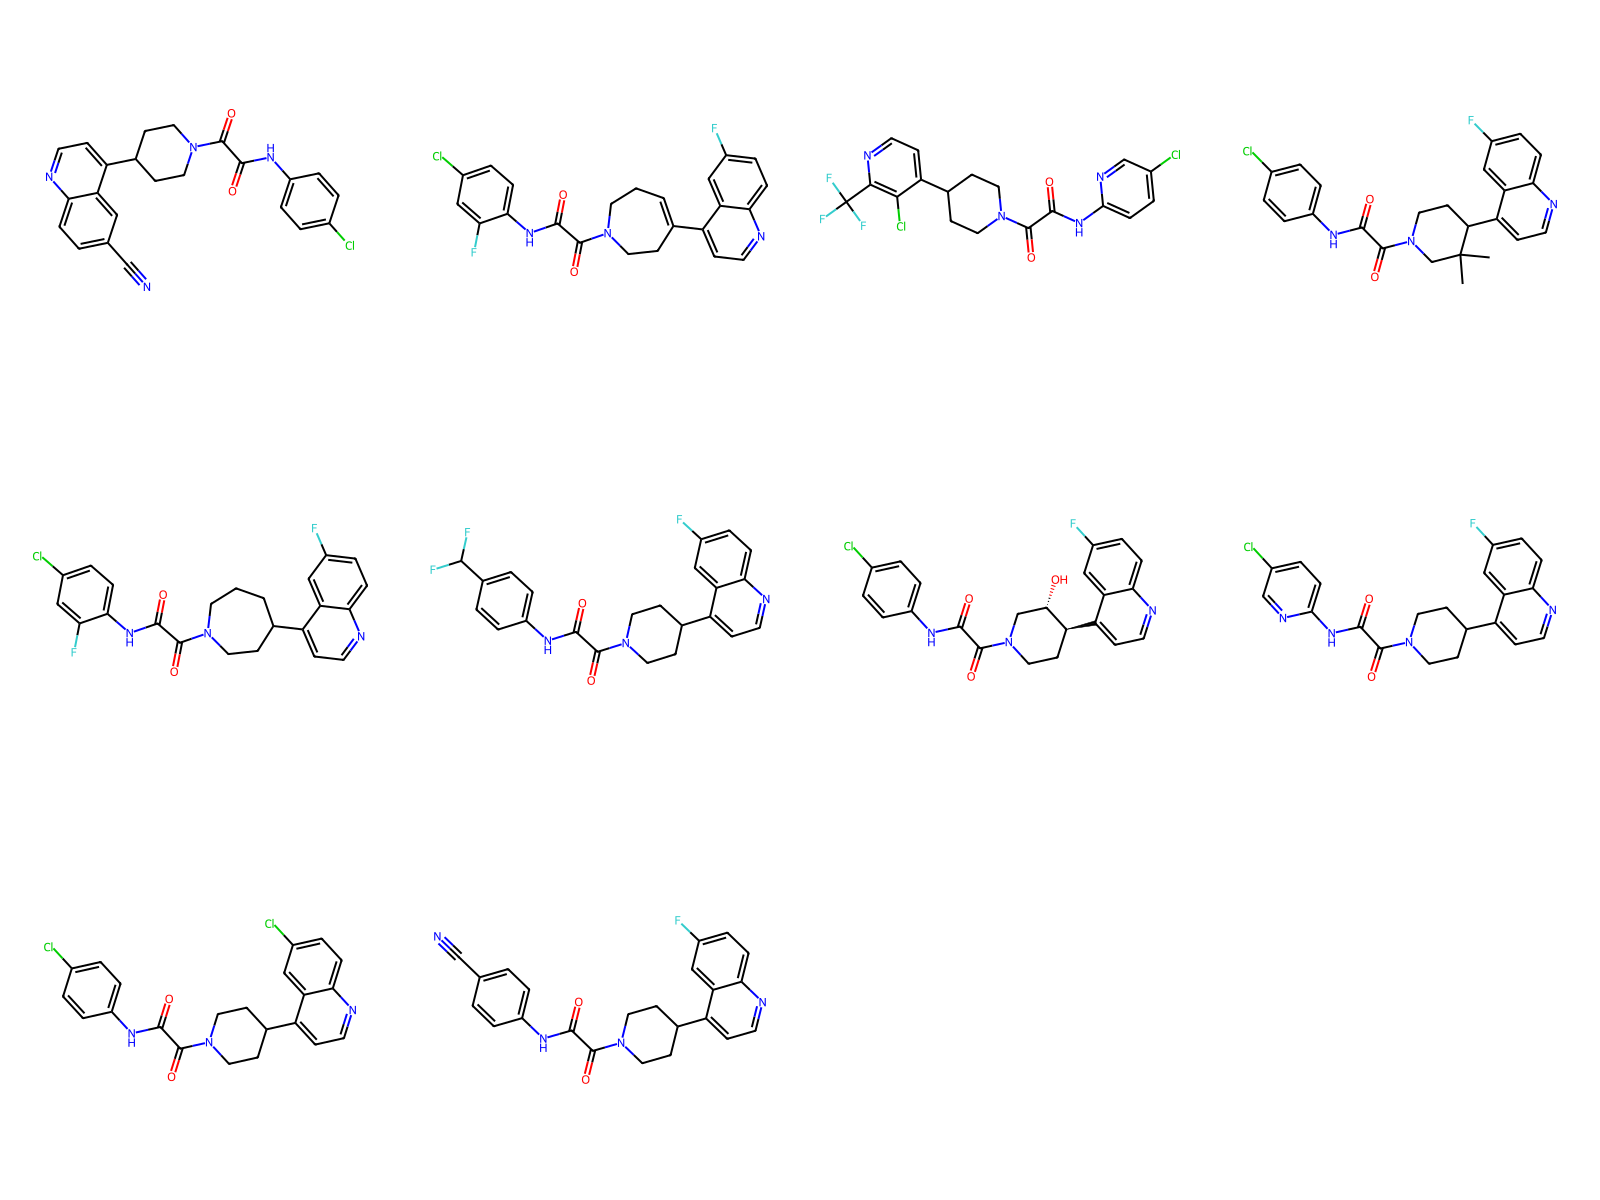

In [75]:
picks = [active_AI[x] for x in pickIndices]
for m in picks:
    AllChem.Compute2DCoords(m)
img=Draw.MolsToGridImage(picks,maxMols=20, molsPerRow=4,subImgSize=(400,400))
img
#image of 10 diverse mols with fragment 629.

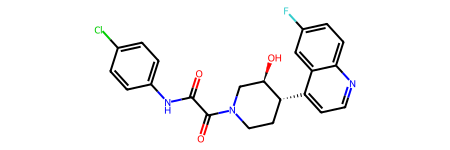

In [92]:
active_AI[15]

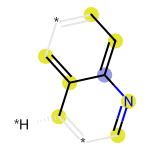

In [86]:
ao = AllChem.AdditionalOutput()
ao.CollectBitInfoMap()
fp = fpgen.GetFingerprint(active_AI[15],additionalOutput=ao)
bi = ao.GetBitInfoMap()
bi
mfp2_svg = Draw.DrawMorganBit(active_AI[15], 629, bi, useSVG=True)
mfp2_svg

In [87]:
bi[629]

((20, 2),)

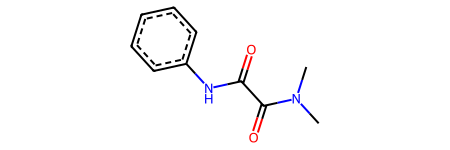

In [89]:
env = Chem.FindAtomEnvironmentOfRadiusN(active_AI[15],4, 2) #--> radius=4, atom=14
amap={}
submol=Chem.PathToSubmol(active_AI[15],env,atomMap=amap)
submol.GetNumAtoms()                                   #--->
amap                                             #---> 
submol

In [91]:
atoms=set()
for bidx in env:
    atoms.add(active_AI[15].GetBondWithIdx(bidx).GetBeginAtomIdx())
    atoms.add(active_AI[15].GetBondWithIdx(bidx).GetEndAtomIdx())

Chem.MolFragmentToSmiles(active_AI[15],atomsToUse=list(atoms),bondsToUse=env,rootedAtAtom=2)

'N(C(=O)C(=O)N(C)C)c1ccccc1'